In [17]:
# Import necessary libraries for data manipulation, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Suppress warnings to avoid unnecessary output
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Step 1: Load the dataset
df = pd.read_csv('data/Tesla.csv')  
df.head()  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [19]:
# Step 2: Inspect dataset structure
df.shape  
df.describe()
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


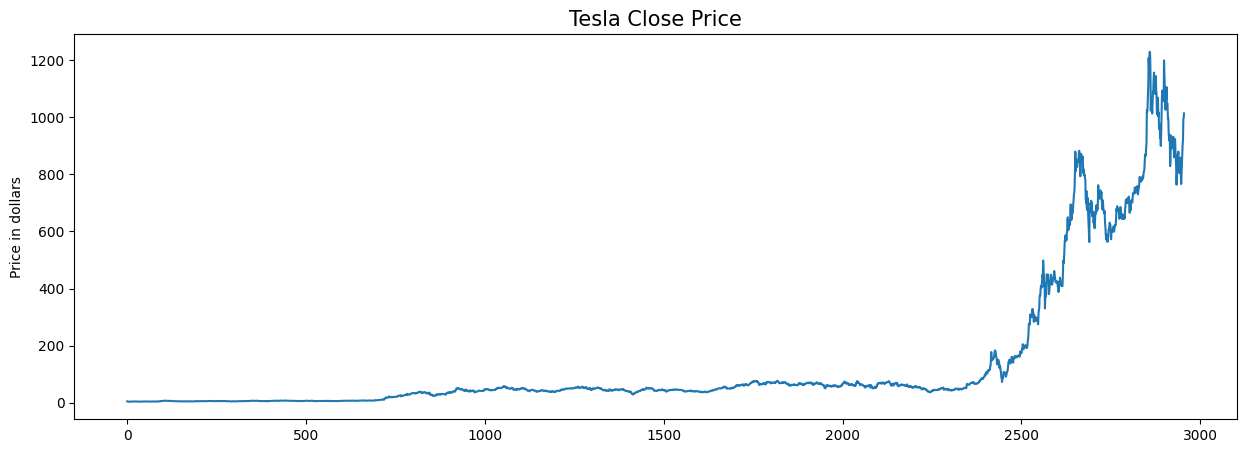

In [20]:
# Step 3: Visualize the 'Close' price
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])  
plt.title('Tesla Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

In [21]:
# Step 4: Data cleaning
# Check if 'Close' and 'Adj Close' columns are identical
df[df['Close'] == df['Adj Close']].shape 

# Drop the redundant 'Adj Close' column
df = df.drop(['Adj Close'], axis=1)

# Check for missing values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

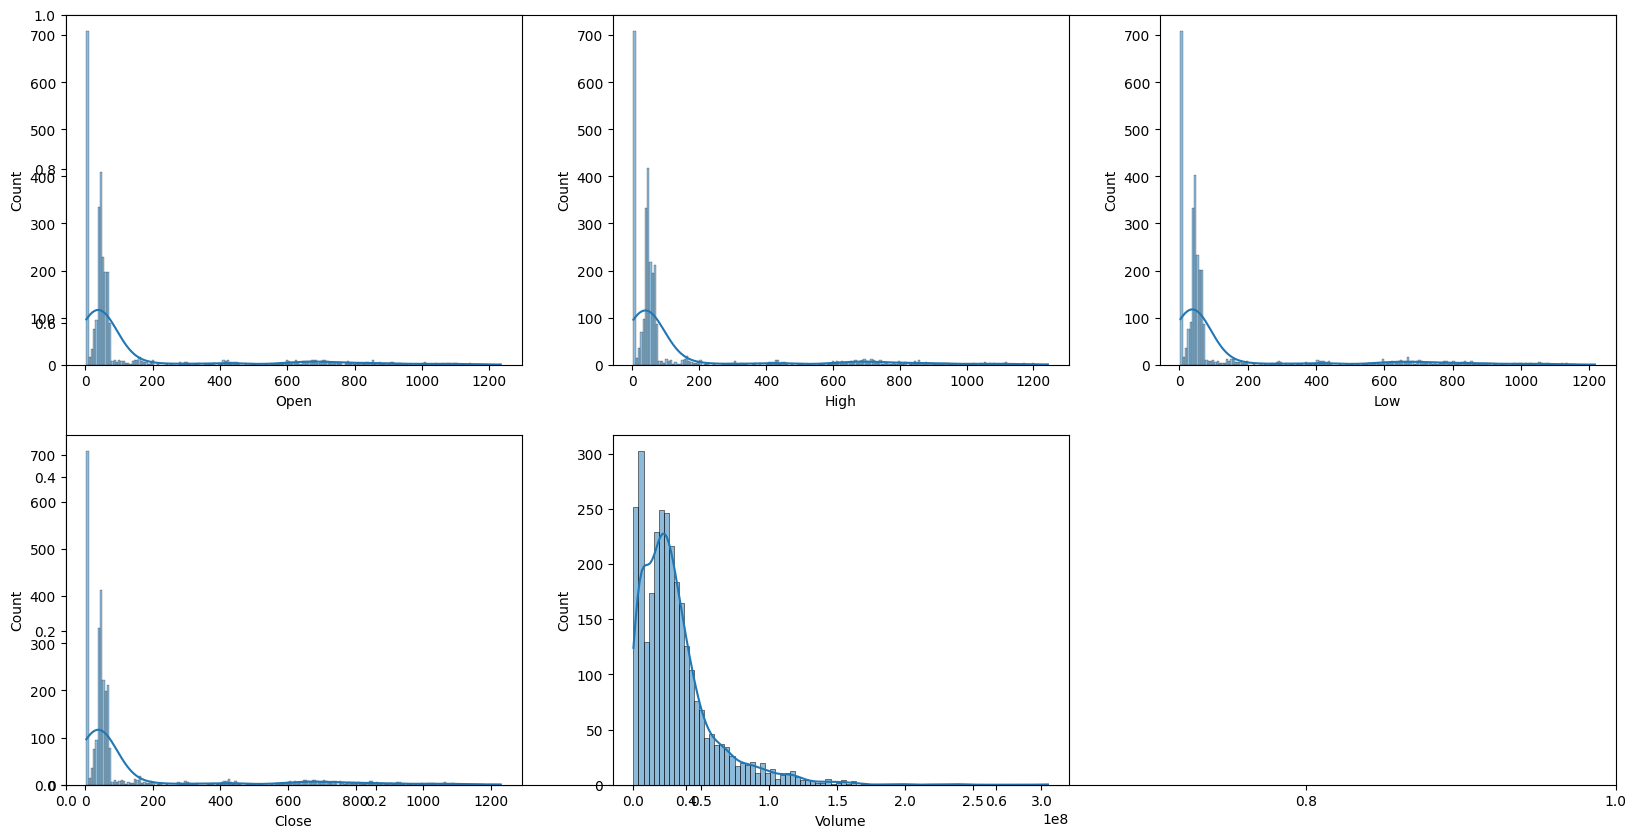

In [24]:
# Step 5: Visualize feature distributions
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot histograms to visualize distributions
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.histplot(df[col], kde=True)  # Histogram with density curve
plt.show()


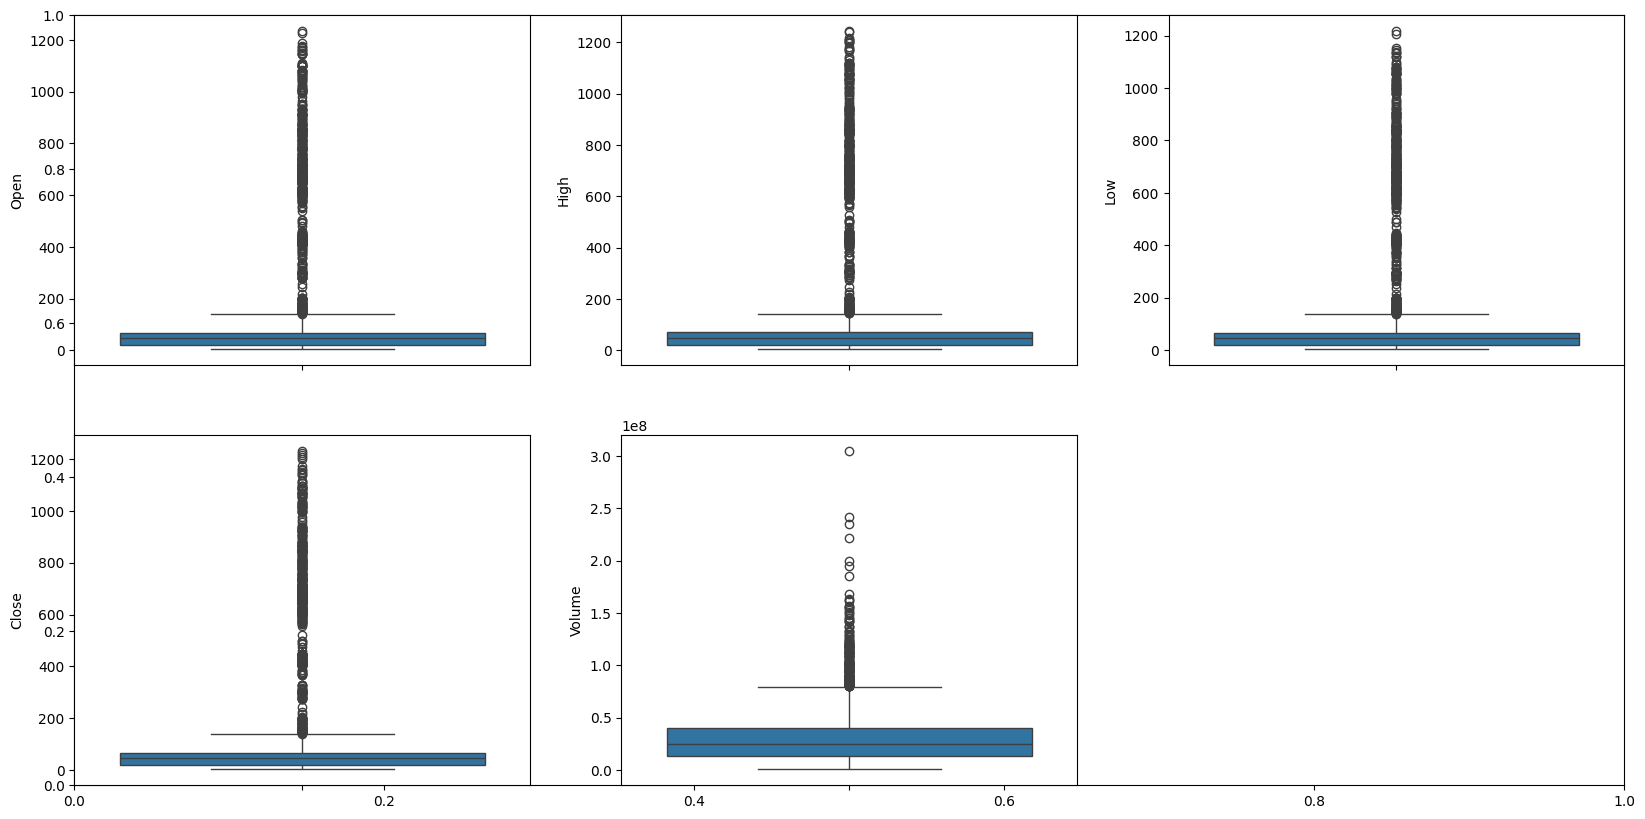

In [25]:
# Plot boxplots to check for outliers
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.boxplot(df[col])
plt.show()

In [27]:
print(df['Date'].head())


0    2010-06-29
1    2010-06-30
2    2010-07-01
3    2010-07-02
4    2010-07-06
Name: Date, dtype: object


In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, handling errors
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [30]:
print(df['Date'].isna().sum())  # Check for invalid dates
df = df.dropna(subset=['Date'])  # Drop rows with invalid dates


0


In [31]:
# Convert 'Date' column to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime format
df = df.dropna(subset=['Date'])  # Remove rows with invalid dates
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010


In [32]:
# Create a new feature 'is_quarter_end' to mark quarter-end months
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010,1
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010,1
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0


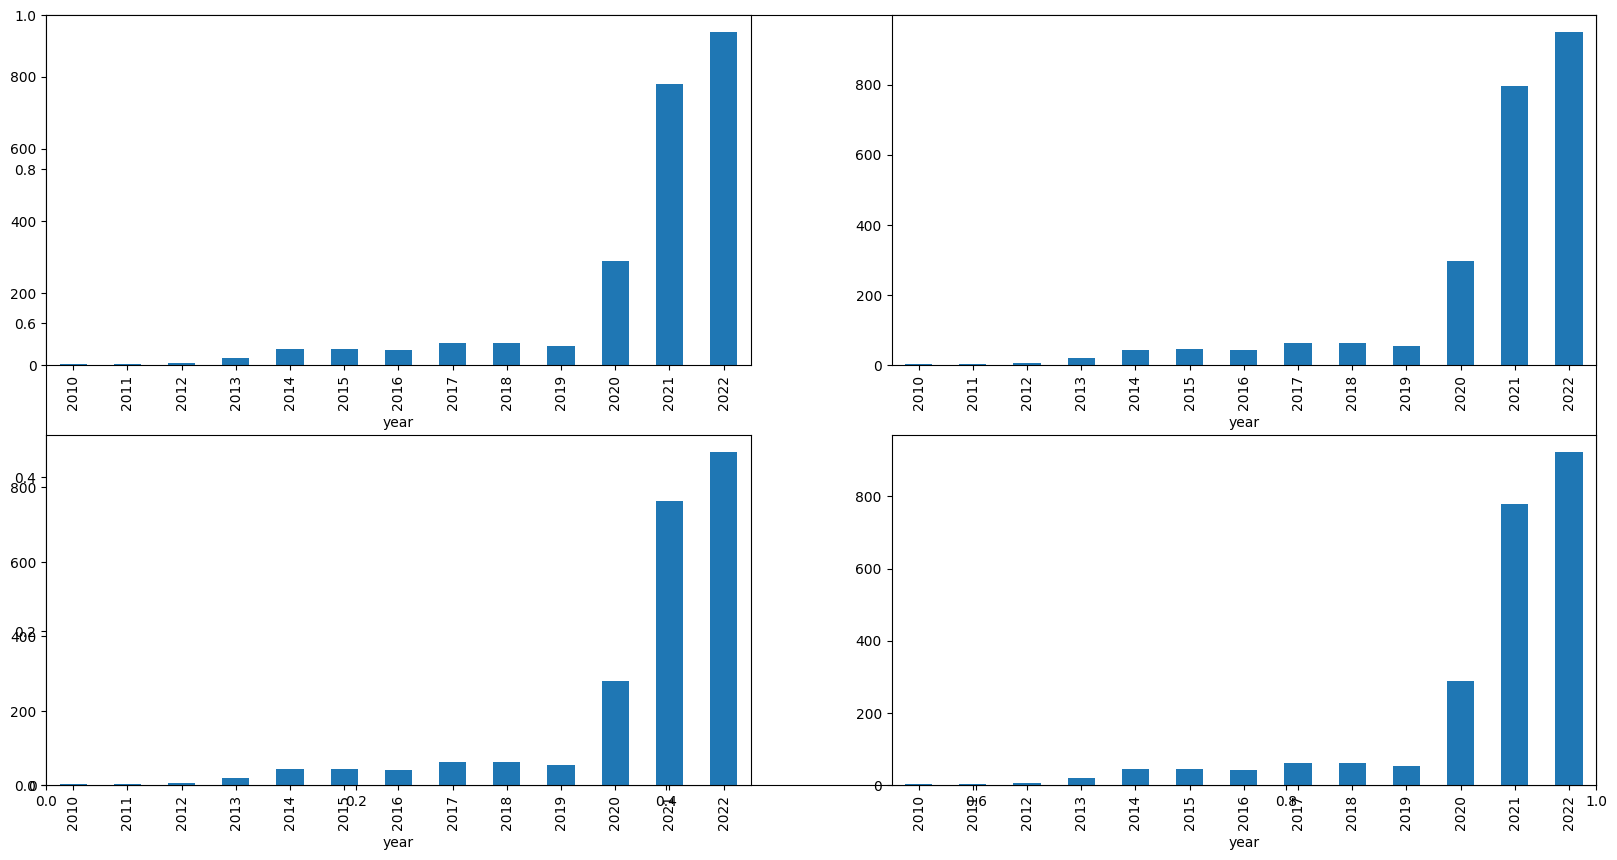

In [33]:
# Step 7: Analyze yearly trends
data_grouped = df.drop('Date', axis=1).groupby('year').mean()

# Plot yearly trends for 'Open', 'High', 'Low', 'Close' prices
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
plt.show()

In [34]:
# Check the average statistics based on quarter-end
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,136.474690,139.523037,133.361644,136.531872,3.194378e+07,15.701987,6.124300,2015.855833
1,143.073168,146.216652,139.506757,143.171146,3.007048e+07,15.736153,7.489426,2015.852971


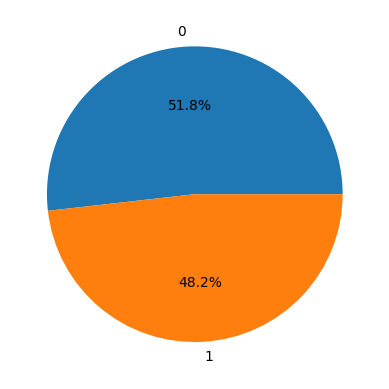

In [35]:
# Step 8: Add new features
# 'open-close' difference
df['open-close'] = df['Open'] - df['Close']

# 'low-high' difference
df['low-high'] = df['Low'] - df['High']

# Create a target variable: 1 if next day's Close > today's Close, else 0
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Visualize the distribution of the target variable
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

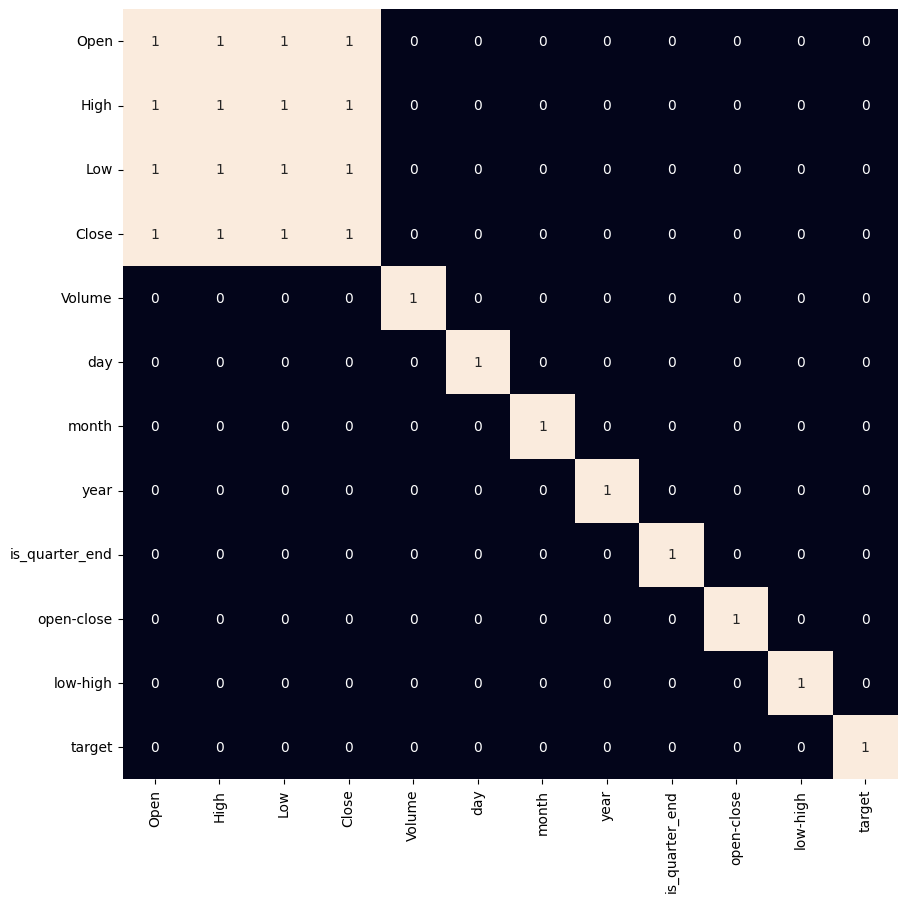

In [36]:
# Step 9: Analyze feature correlations
# Plot heatmap to check high correlations
plt.figure(figsize=(10, 10))
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [38]:
# Step 10: Prepare data for modeling
# Select relevant features and the target variable
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the dataset into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2660, 3) (296, 3)


In [39]:
# Step 11: Train and evaluate models
# Initialize models: Linear Regression, SVM, and XGBoost
models = [LinearRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)  # Train the model
    print(f'{models[i]} : ')
    if hasattr(models[i], 'predict_proba'):
        # Use ROC AUC score for evaluation
        print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))
        print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:, 1]))
    else:
        # Evaluate models that don't support probability outputs
        print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict(X_train)))
        print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict(X_valid)))
    print()

LinearRegression() : 
Training Accuracy :  0.5142771842943049
Validation Accuracy :  0.5378205128205129

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.49962730810045985
Validation Accuracy :  0.5403388278388278

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

In [40]:
# Step 12: Make predictions for a random sample
sample_index = np.random.randint(0, len(df))
sample_data = df.iloc[sample_index]

# Calculate price change
if 'Price_Change' not in sample_data:
    sample_data['Price_Change'] = sample_data['Close'] - sample_data['Open']

# Prepare the sample for prediction
sample_features = np.array([[
    sample_data['open-close'],
    sample_data['low-high'],
    sample_data['is_quarter_end']
]])
scaled_sample = scaler.transform(sample_features)

# Use the first model for prediction
selected_model = models[0]
predicted_movement = selected_model.predict(scaled_sample)[0]

# Estimate next day's price based on the prediction
if predicted_movement == 1:
    predicted_price = sample_data['Close'] - abs(sample_data['Price_Change'])
else:
    predicted_price = sample_data['Close'] + abs(sample_data['Price_Change'])

In [41]:
# Display prediction results
print(f"Sample Data: {sample_data}")
print(f"Predicted Next Day Price: {predicted_price}")
print(f"Predicted Movement (1 for Up, 0 for Down/Same): {predicted_movement}")

Sample Data: Date              2017-05-16 00:00:00
Open                        63.518002
High                        64.012001
Low                            63.028
Close                          63.402
Volume                       20762500
day                                16
month                               5
year                             2017
is_quarter_end                      0
open-close                   0.116002
low-high                    -0.984001
target                              0
Price_Change                -0.116002
Name: 1732, dtype: object
Predicted Next Day Price: 63.518002
Predicted Movement (1 for Up, 0 for Down/Same): 0.5120569126721647
